**Array-Oriented Programming with Arrays**

Using Numpy arrays alllows you to use concise array expressions, which would normally require loops to complete, and this replacement is called *vectorization*

The *np.meshgrid()* function takes two 1-dimensional arrays and returns two two-dimensional matrices corresponding to all the pairs of x and y in the array

In this example, we are trying to evaluate the function **sqrt(x^2 + y^2)** across a grid of values

In [1]:
import numpy as np

In [2]:
points = np.arange(-5, 5, 0.01)

In [4]:
xs, ys = np.meshgrid(points, points)


xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [5]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

At this point, evaluating the function is up to writing the same expression trhat you would write with just 2 points

In [8]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

You can use matplotlib to visualize this array

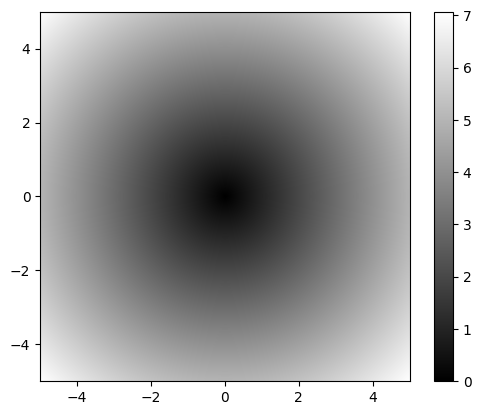

In [10]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()

In [11]:
plt.close('all')

**Expressing Conditional Logic as Array Operations**

The function np.where is a vectorized version of the expression: *x if condition else y*

In [13]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

In this example, we would take an element from xarr if the corresponding cond value is *True*, and if it is *False*, take it from yarr, and we can just use np.where for this

In [14]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to np.where do not need to be arrays. One or both of them can be scalars. Typically in DA, where is used to produce a new array based on another array.

In this next example, we will get a matrix of random values, and replace all negative values with -2 and all positive values with 2

In [30]:
rng = np.random

arr = rng.standard_normal((4,4))
arr

array([[ 0.31407679, -0.87838242,  0.67551201,  0.52762707],
       [ 1.15519945,  1.56737076, -0.51476292, -0.59096352],
       [ 1.4414729 , -0.57622579,  0.28894287, -0.67743572],
       [ 1.1711286 ,  0.97244291,  0.09481265,  0.27276145]])

In [31]:
arr > 0

array([[ True, False,  True,  True],
       [ True,  True, False, False],
       [ True, False,  True, False],
       [ True,  True,  True,  True]])

In [35]:
np.where(arr > 0, 2, -2)


array([[ 2, -2,  2,  2],
       [ 2,  2, -2, -2],
       [ 2, -2,  2, -2],
       [ 2,  2,  2,  2]])

**Mathematical and Statistical Methods**

*Aggregations* are a set of mathematical functions that show statistics about an entire array or about the data around an axis are accessible as methods of the array class.

In this function, I will compute some aggregate statistics

In [36]:
arr = rng.standard_normal((5, 4))
arr

array([[-0.27371295, -0.25362292,  0.51060402, -2.22458586],
       [ 0.4522723 ,  0.30017304, -1.55630476,  0.35555245],
       [ 1.02606258, -0.81188209, -1.12251157, -1.20005877],
       [-2.06642625,  1.27550685, -1.45827258,  0.06509659],
       [-0.86444359,  1.24725441, -0.058519  ,  0.74415474]])

In [37]:
arr.mean() #Mean of the elements in the array

-0.29568316751375373

In [38]:
np.mean(arr) #Mean of the elements in the array

-0.29568316751375373

In [39]:
np.sum(arr) #Sum of all the elements in the array

-5.913663350275074

Some functions, like *mean()* and *sum()* have an optional axis argument, which computes the statistic over the given axis, which results in an array with one less dimension

In [40]:
arr.mean(axis=1)

array([-0.56032943, -0.11207674, -0.52709746, -0.54602385,  0.26711164])

In [41]:
arr.sum(axis=0)

array([-1.72624791,  1.7574293 , -3.68500389, -2.25984085])

Other methods, like *cumsum* and *cumprod* do not aggregate, and instead produce a separate array

In [42]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

The expression *arr.cumsum(axis=0)* computes the cumulative sum along the rows, while *arr.cumsum(axis=1)* computes the cumulative sum across the columns

In [43]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [44]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

**Methods for Boolean Arrays**

Boolean values are obtained as 1 and 0 for True and False, respectively

In [53]:
arr = rng.standard_normal(100)

(arr > 0).sum() #Number of positive values

49

In [54]:
(arr < 0).sum() #Number of negatiove values

51

The parentheses around *arr < 0* and *arr < 0* are necessary, since they encapsulate the temporary value of arr < 0 and arr > 0, which sum() is called on

The method *any* checks if one or more values in the array are True, while *all* checks if every value is true

In [55]:
bools = np.array([False, False, True, False])
bools.any()

True

In [56]:
bools.all()

False

In [58]:
bools = np.array([True, True, True, True])
bools.all()

True

These methods also work with non-Boolean arrays, where nonzero elements are treated as True

**Sorting**

like the standard Python *list*, Numpy arrays can be sorted in place with the *sort* method

In [59]:
arr = rng.standard_normal(6)
arr

array([ 0.10291683, -0.70994064,  0.86440019,  1.47617662,  0.59047561,
       -1.55771832])

In [61]:
arr.sort()
arr

array([-1.55771832, -0.70994064,  0.10291683,  0.59047561,  0.86440019,
        1.47617662])

You can sort a one-dimensional section of values in a multidimensional array by passing the axis argument

In [64]:
arr = rng.standard_normal((5, 3))
arr

array([[ 0.01494688, -0.35113889,  1.63980191],
       [ 1.21580733,  0.89041107,  1.21702177],
       [-2.03647576, -1.50277488, -0.39221833],
       [-0.08627477, -1.72570156, -2.86028716],
       [ 0.1777954 , -1.19944551,  0.62156354]])

*sort(axis=0)* sorts the values within each column, while *sort(axis=1)* sorts the values within each row

In [65]:
arr.sort(axis=0)
arr

array([[-2.03647576, -1.72570156, -2.86028716],
       [-0.08627477, -1.50277488, -0.39221833],
       [ 0.01494688, -1.19944551,  0.62156354],
       [ 0.1777954 , -0.35113889,  1.21702177],
       [ 1.21580733,  0.89041107,  1.63980191]])

In [67]:
arr.sort(axis=1)
arr

array([[-2.86028716, -2.03647576, -1.72570156],
       [-1.50277488, -0.39221833, -0.08627477],
       [-1.19944551,  0.01494688,  0.62156354],
       [-0.35113889,  0.1777954 ,  1.21702177],
       [ 0.89041107,  1.21580733,  1.63980191]])

*np.sort()* returns a new array of the sorted values of the original array, instead of modifying the array.

In [68]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
aorted_arr2 = np.sort(arr2)

aorted_arr2

array([-10,  -3,   0,   1,   5,   7])

**Unique and Other Set Logic**

Numpy has some basic operations for one-dimensional ndarrays, like *np.unique()*, which returns the sorted and unique values in an array 

In [69]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [70]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

The pure Python alternative is: 

In [71]:
sorted(set(names))

['Bob', 'Joe', 'Will']

*numpy.in1d* tests the membership of elements in an array in another, and it returns a boolean array.

In [73]:
values = np.array([6, 0, 0, 3, 2, 5, 6])\

np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])